# Lead Scoring Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
# Importing all necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# To ignore all warnings (not recommended unless you're sure):
warnings.filterwarnings("ignore")

# To ignore a specific category of warnings (e.g., DeprecationWarning):
warnings.filterwarnings("ignore", category=DeprecationWarning)

# To ignore a specific warning message (e.g., a specific string in the warning message):
warnings.filterwarnings("ignore", message="Some specific warning message")


In [2]:
df=pd.read_csv('Leads.csv')
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Dropping columns not nececcery for building Logistic Regression model

df.drop(["Prospect ID","Lead Number"],axis=1,inplace=True)

In [5]:
df.shape

(9240, 35)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [7]:
# Replacing columns having "Select" as a value with 'nan'

In [8]:
df.Specialization.replace('Select',np.nan,inplace=True)
df['How did you hear about X Education'].replace('Select',np.nan,inplace=True)
df['Lead Profile'].replace('Select',np.nan,inplace=True)
df.City.replace('Select',np.nan,inplace=True)

In [9]:
df.isna().sum()/len(df)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [10]:
# Dropping columns with more than 40 Percent null values 
nulls=df.isna().sum()/len(df)*100

In [11]:
nulls=pd.DataFrame(nulls[nulls>40])
nulls=nulls.index

In [12]:
nulls

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [13]:
df.drop(df[nulls],axis=1,inplace=True)

In [14]:
df.isna().sum()/len(df)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [15]:
# Checking the Data types for all remaining columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

## Univariate Analysis 

In [16]:
# imbalance of data

df.Converted.value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

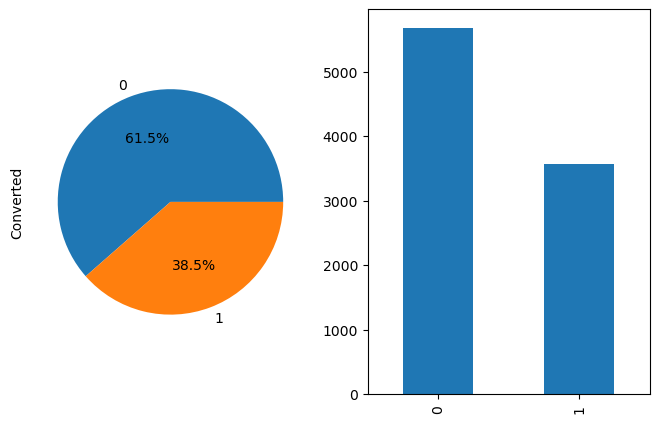

In [17]:
plt.figure(figsize=[8,5])
plt.subplot(1,2,1)
df.Converted.value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
df.Converted.value_counts().plot.bar()
plt.show()

The Data is reasonably balalnced, with approximately 60, 40 split. The target variable is "1" in this case
It can be seen that the conversion rate is almost 39 percent

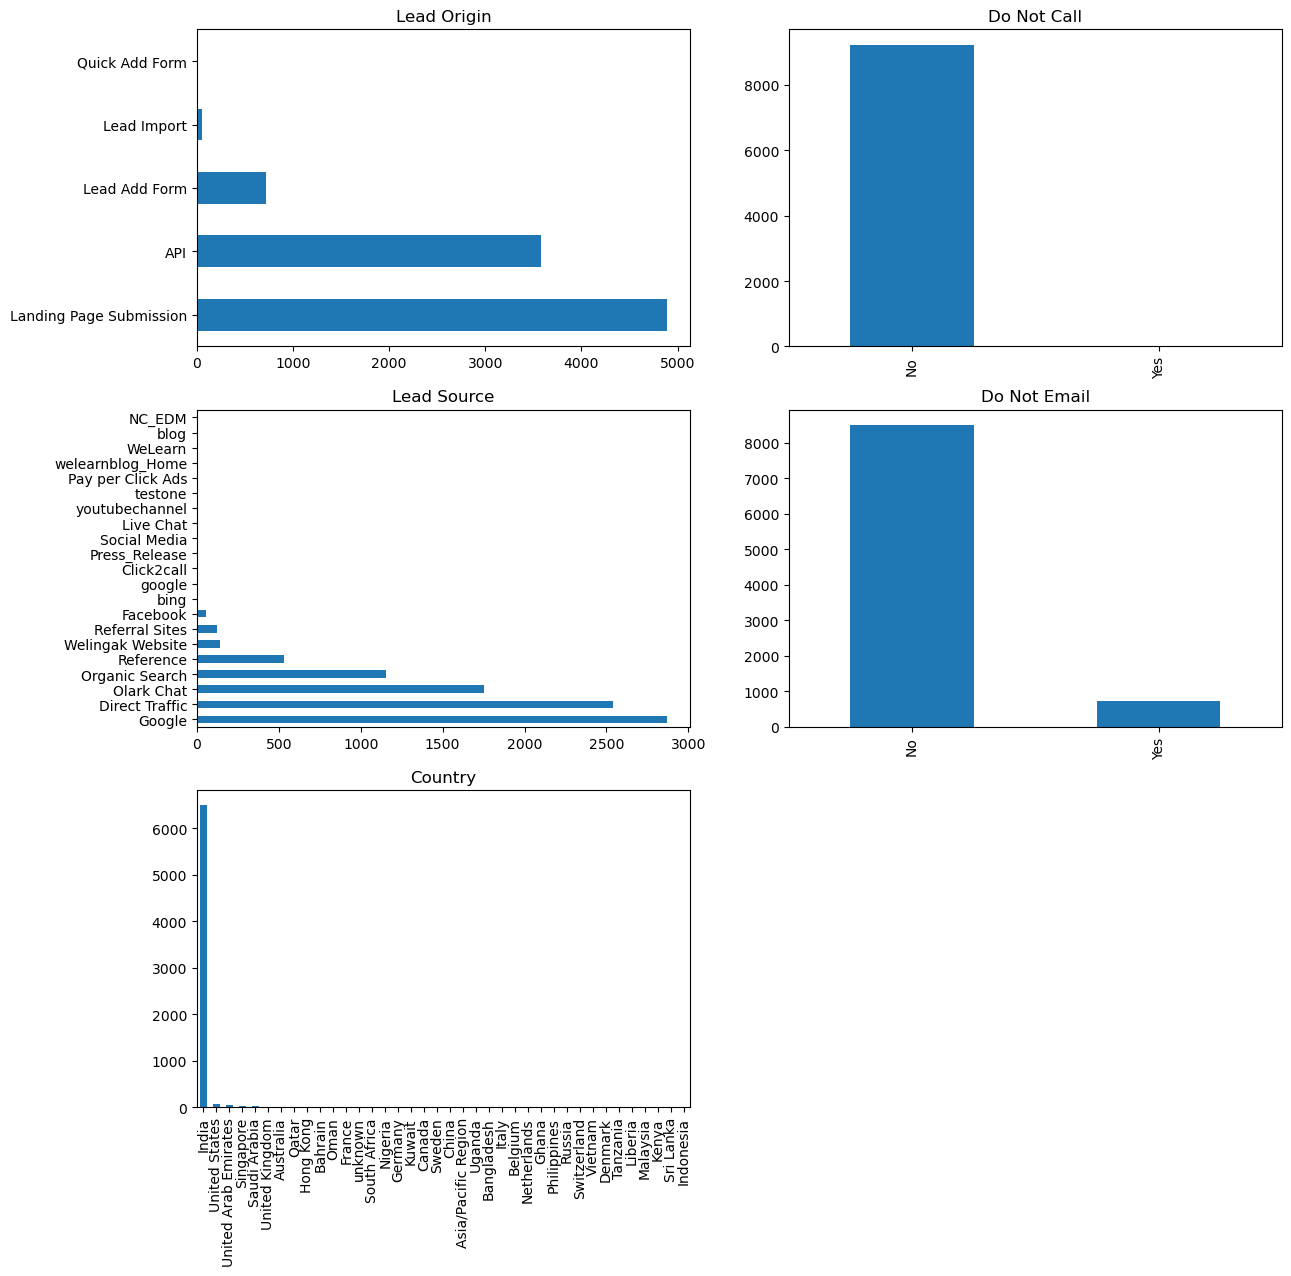

In [18]:
plt.figure(figsize=(14,14))
plt.subplot(3,2,1)
plt.title('Lead Origin')
df['Lead Origin'].value_counts().plot.barh()
plt.subplot(3,2,2)
plt.title('Do Not Call')
df['Do Not Call'].value_counts().plot.bar()
plt.subplot(3,2,3)
plt.title('Lead Source')
df['Lead Source'].value_counts().plot.barh()
plt.subplot(3,2,4)
plt.title('Do Not Email')
df['Do Not Email'].value_counts().plot.bar()
plt.subplot(3,2,5)
plt.title('Country')
df['Country'].value_counts().plot.bar()
plt.show()

In [19]:
# Replacing 'google' with 'Google' in Lead Source column 

df['Lead Source'].replace('google','Google',inplace=True)

In [20]:
# The column Country doesnt serve a purpose, since it is completely skewed
# the column Lead Source, has only few features useful in getting the leads, others dont have any contribution

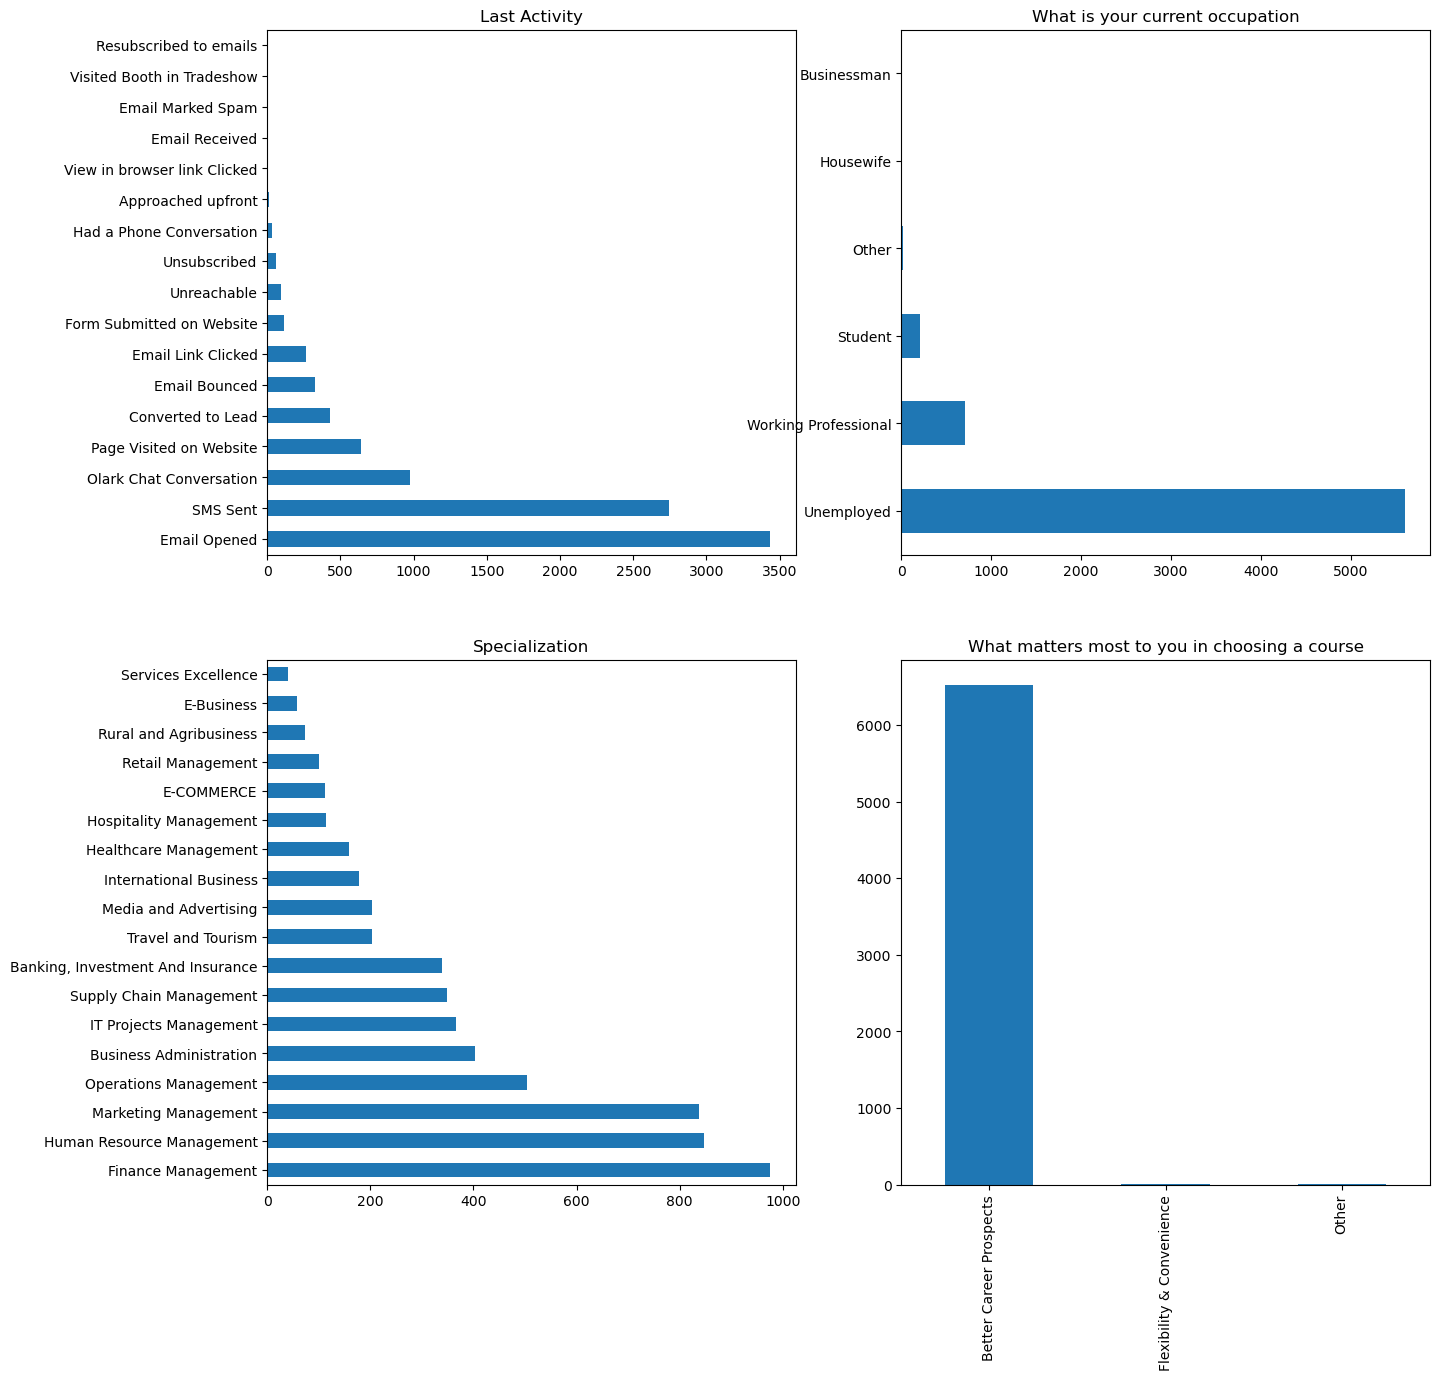

In [21]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title('Last Activity')
df['Last Activity'].value_counts().plot.barh()
plt.subplot(2,2,2)
plt.title('What is your current occupation')
df['What is your current occupation'].value_counts().plot.barh()
plt.subplot(2,2,3)
plt.title('Specialization')
df['Specialization'].value_counts().plot.barh()
plt.subplot(2,2,4)
plt.title('What matters most to you in choosing a course')
df['What matters most to you in choosing a course'].value_counts().plot.bar()
plt.show()

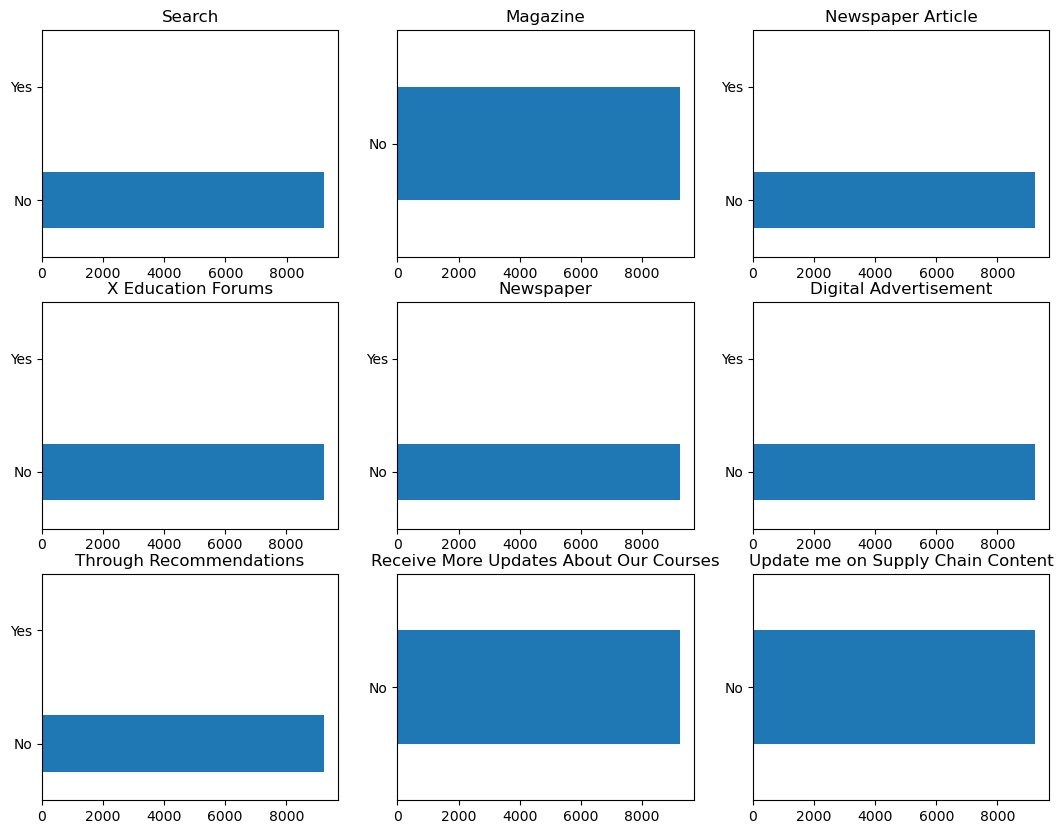

In [22]:
plt.figure(figsize=(13,10))
plt.subplot(3,3,1)
plt.title('Search')
df['Search'].value_counts().plot.barh()
plt.subplot(3,3,2)
plt.title('Magazine')
df['Magazine'].value_counts().plot.barh()
plt.subplot(3,3,3)
plt.title('Newspaper Article')
df['Newspaper Article'].value_counts().plot.barh()
plt.subplot(3,3,4)
plt.title('X Education Forums')
df['X Education Forums'].value_counts().plot.barh()
plt.subplot(3,3,5)
plt.title('Newspaper')
df['Newspaper'].value_counts().plot.barh()
plt.subplot(3,3,6)
plt.title('Digital Advertisement')
df['Digital Advertisement'].value_counts().plot.barh()
plt.subplot(3,3,7)
plt.title('Through Recommendations')
df['Through Recommendations'].value_counts().plot.barh()
plt.subplot(3,3,8)
plt.title('Receive More Updates About Our Courses')
df['Receive More Updates About Our Courses'].value_counts().plot.barh()
plt.subplot(3,3,9)
plt.title('Update me on Supply Chain Content')
df['Update me on Supply Chain Content'].value_counts().plot.barh()
plt.show()

All the columns, Search, magzine, newspaper articles, Xeduction forums, Newspaper Advertisement, Through Recommendations etc are highly skewed, and hence dont serve purpose in identifiying probable customers

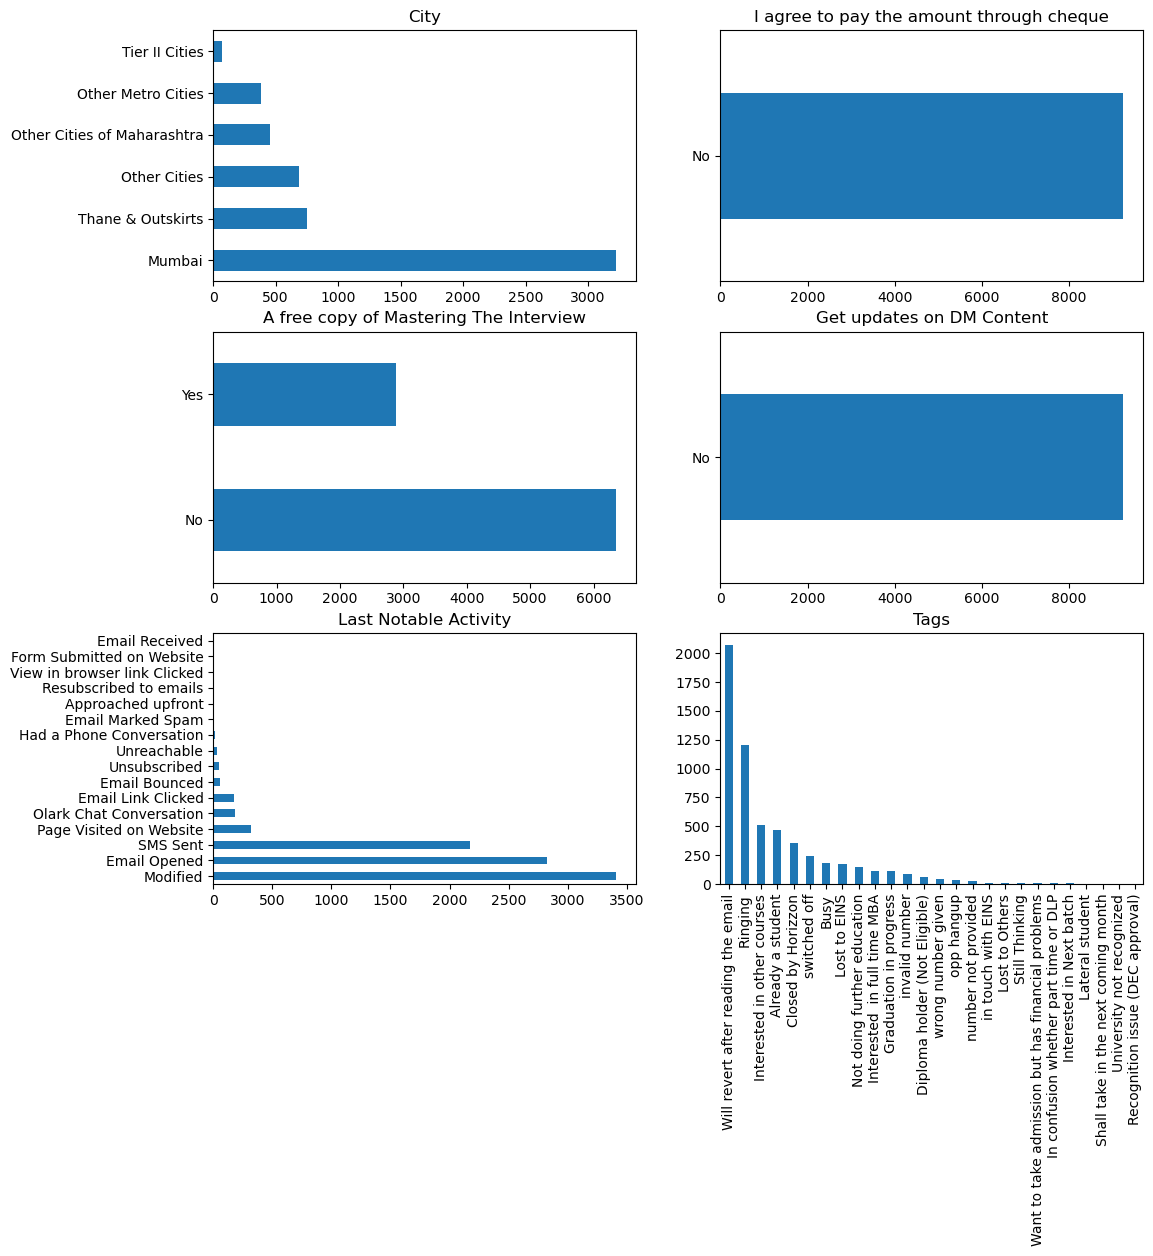

In [23]:
plt.figure(figsize=(12,15))
plt.subplot(4,2,1)
plt.title('City')
df['City'].value_counts().plot.barh()
plt.subplot(4,2,2)
plt.title('I agree to pay the amount through cheque')
df['I agree to pay the amount through cheque'].value_counts().plot.barh()
plt.subplot(4,2,3)
plt.title('A free copy of Mastering The Interview')
df['A free copy of Mastering The Interview'].value_counts().plot.barh()
plt.subplot(4,2,3)
plt.title('A free copy of Mastering The Interview')
df['A free copy of Mastering The Interview'].value_counts().plot.barh()
plt.subplot(4,2,4)
plt.title('Get updates on DM Content')
df['Get updates on DM Content'].value_counts().plot.barh()
plt.subplot(4,2,5)
plt.title('Last Notable Activity')
df['Last Notable Activity'].value_counts().plot.barh()
plt.subplot(4,2,6)
plt.title('Tags')
df['Tags'].value_counts().plot.bar()
plt.show()

Columns that do not serve a purpose

Magazine
, Recieve more updates about the course
, Update me on supply chain content

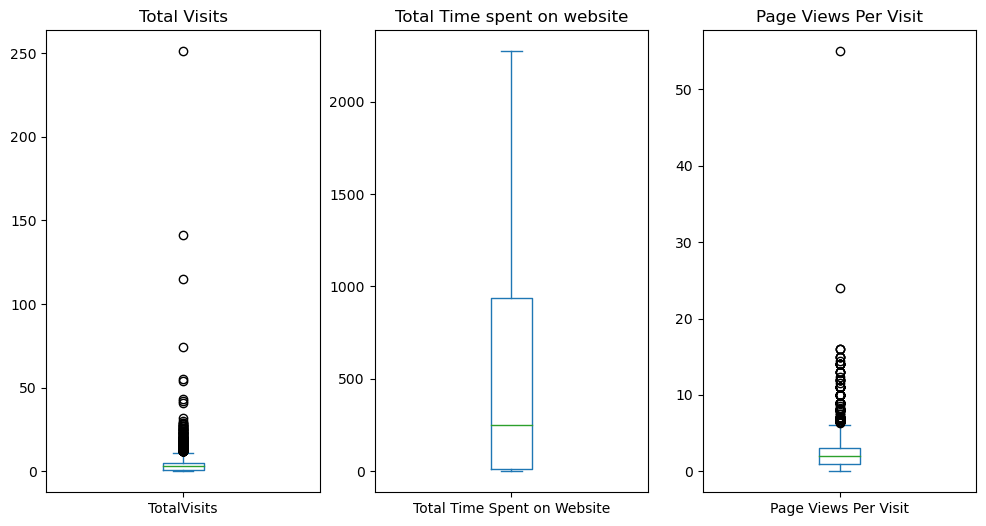

In [24]:
plt.figure(figsize=[12,6])
plt.subplot(1,3,1)
plt.title('Total Visits')
df['TotalVisits'].plot.box()
plt.subplot(1,3,2)
plt.title('Total Time spent on website')
df['Total Time Spent on Website'].plot.box()
plt.subplot(1,3,3)
plt.title('Page Views Per Visit')
df['Page Views Per Visit'].plot.box()
plt.show()

From Univariate Anaysis we can understand that there are some columns that are majorly skewed, and are not needed in the analysis 

## Bivariate Analysis

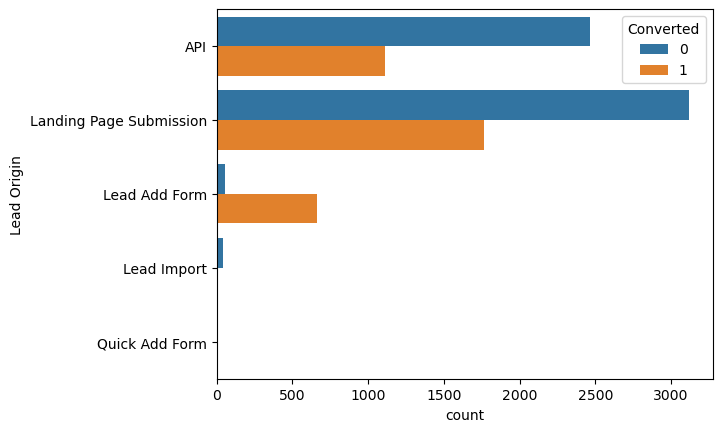

In [25]:
sns.countplot(y=df['Lead Origin'],hue=df.Converted)
plt.show()

In [26]:
# Looks like lead ad forms, have 90% conversion rate which can be an important candidate in the model
# Landing page Submission, has more than 50% conversion rate 
# API has the least conversion rate among all three which is less than 50%

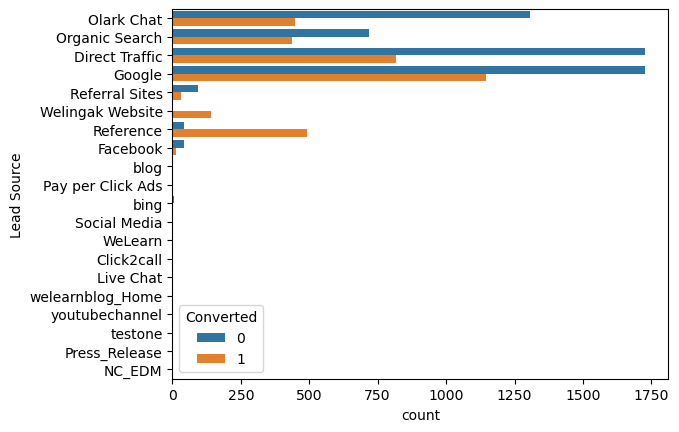

In [27]:
sns.countplot(y=df['Lead Source'],hue=df.Converted)
plt.show()

In [28]:
# Out of all the lead sources, Reference, Welingak website, Google, Organic search have good conversion rates

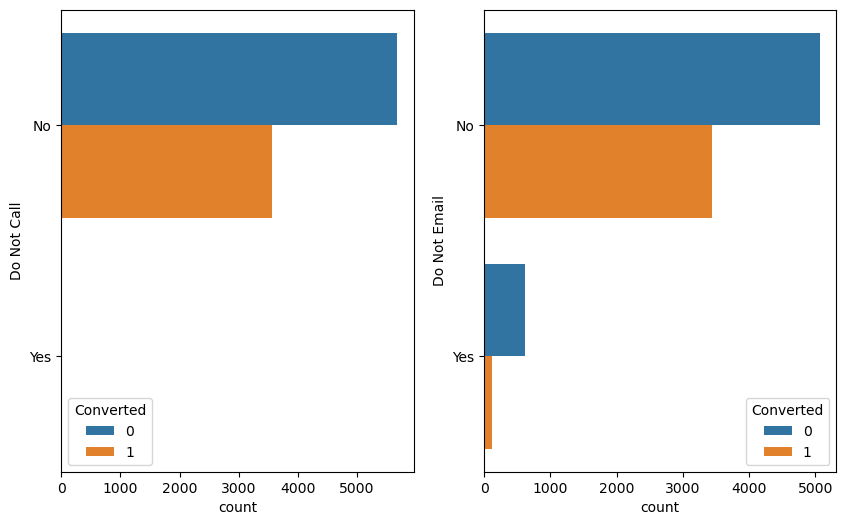

In [29]:
plt.figure(figsize=[10,6])
plt.subplot(1,2,1)
sns.countplot(y=df['Do Not Call'],hue=df.Converted)
plt.subplot(1,2,2)
sns.countplot(y=df['Do Not Email'],hue=df.Converted)
plt.show()
plt.show()

In [30]:
# There is no inference from both the columns, as majority customers do not want to recieve emails and calls from the customers

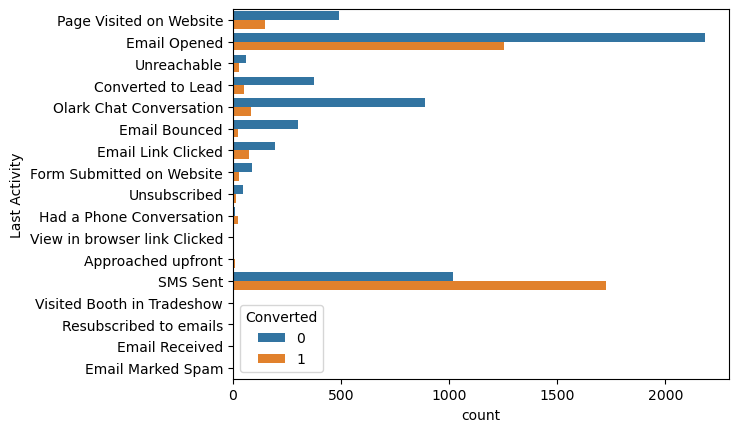

In [31]:
sns.countplot(y=df['Last Activity'],hue=df.Converted)
plt.show()

In [32]:
df['Last Activity']=df['Last Activity'].replace(['Had a Phone converstion','View in browser link Clicked','Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other')

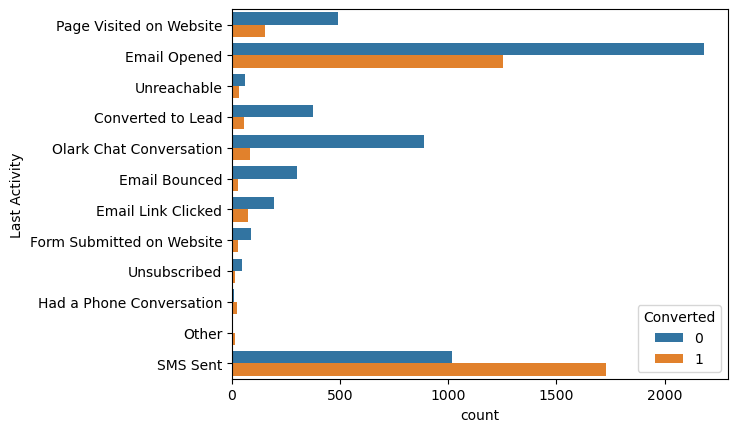

In [33]:
sns.countplot(y=df['Last Activity'],hue=df.Converted)
plt.show()

In [34]:
# SMS sent has great conversion rate after which comes email opened.

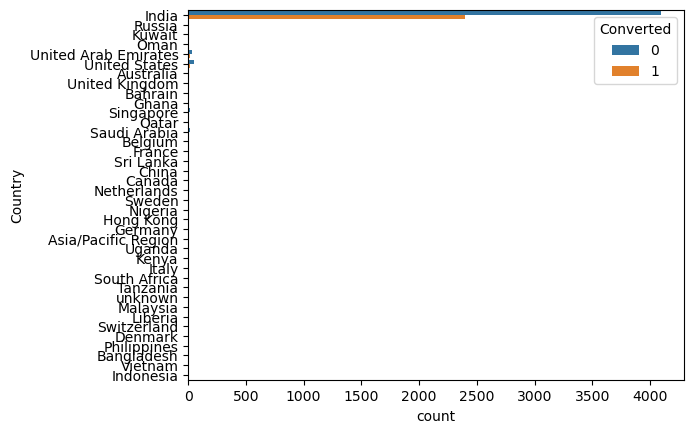

In [35]:
sns.countplot(y=df['Country'],hue=df.Converted)
plt.show()

In [36]:
# Majority of customers are from India, hence this column serves no purpose in the modeling

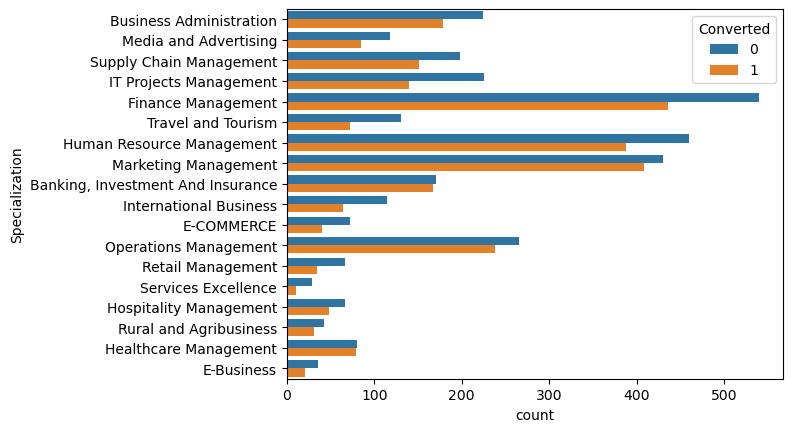

In [37]:
sns.countplot(y=df['Specialization'],hue=df.Converted)
plt.show()

In [38]:
# Specialization column is an important one since the conversion rate for a lot of specializations is very good and can be an important column in modelling

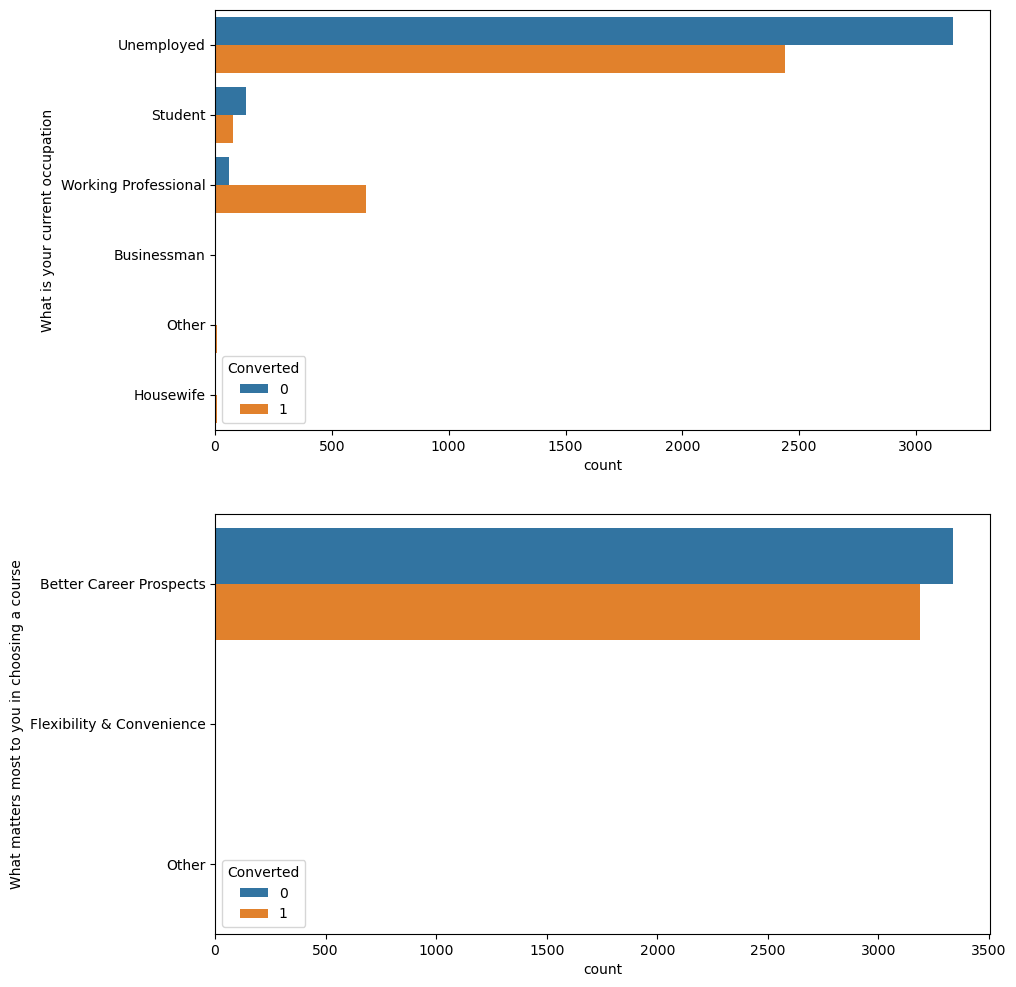

In [39]:
plt.figure(figsize=[10,12])
plt.subplot(2,1,1)
sns.countplot(y=df['What is your current occupation'],hue=df.Converted)
plt.subplot(2,1,2)
sns.countplot(y=df['What matters most to you in choosing a course'],hue=df.Converted)
plt.show()

In [40]:
# It looks like unemployed customers and working professionals have the highest conversion rate, the company should target these categories of customers more

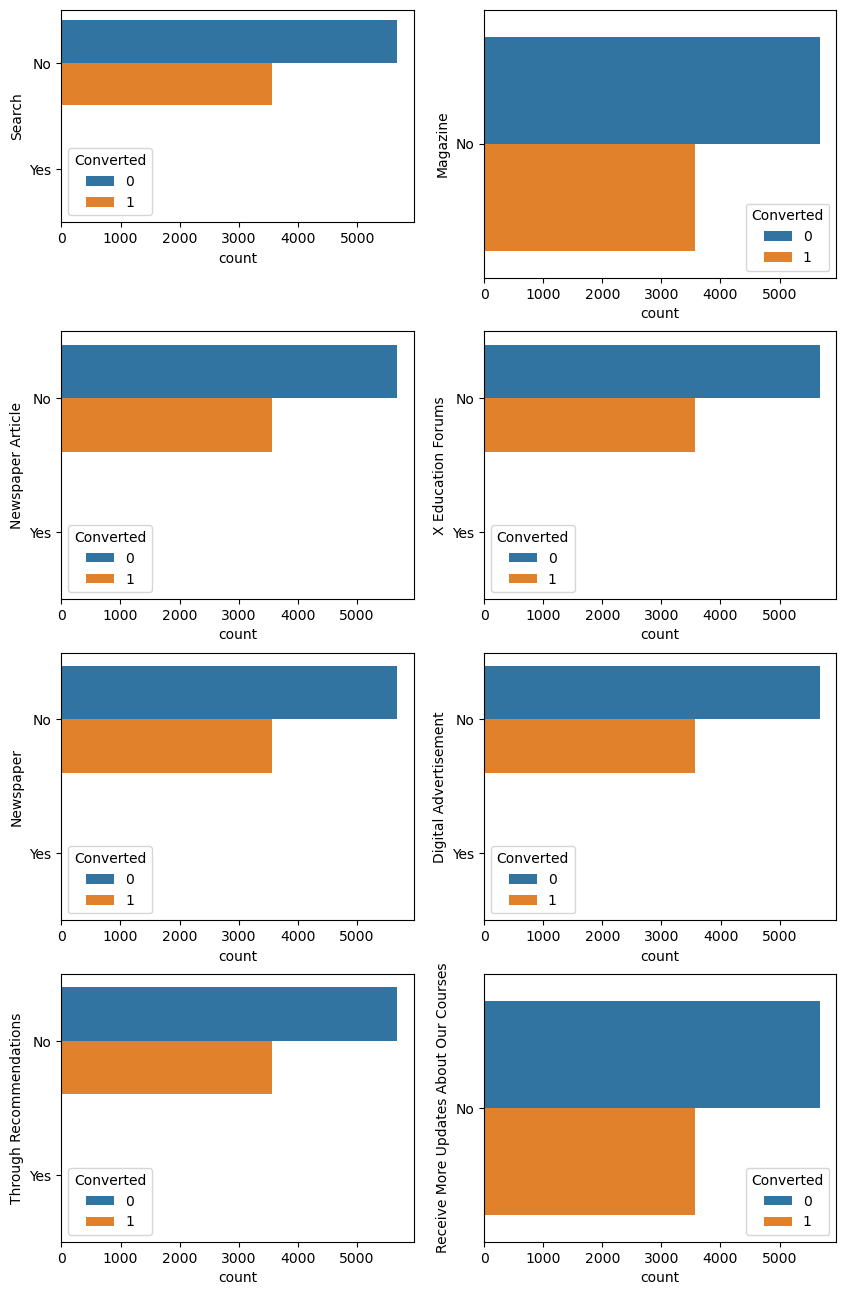

In [41]:
plt.figure(figsize=[10,16])
plt.subplot(5,2,1)
sns.countplot(y=df['Search'],hue=df.Converted)
plt.subplot(4,2,2)
sns.countplot(y=df['Magazine'],hue=df.Converted)
plt.subplot(4,2,3)
sns.countplot(y=df['Newspaper Article'],hue=df.Converted)
plt.subplot(4,2,4)
sns.countplot(y=df['X Education Forums'],hue=df.Converted)
plt.subplot(4,2,5)
sns.countplot(y=df['Newspaper'],hue=df.Converted)
plt.subplot(4,2,6)
sns.countplot(y=df['Digital Advertisement'],hue=df.Converted)
plt.subplot(4,2,7)
sns.countplot(y=df['Through Recommendations'],hue=df.Converted)
plt.subplot(4,2,8)
sns.countplot(y=df['Receive More Updates About Our Courses'],hue=df.Converted)
plt.show()

In [42]:
# All the above columns like search, magazine, newspaper article etc have majority class as no, which means these columns are not important and can be dropped 

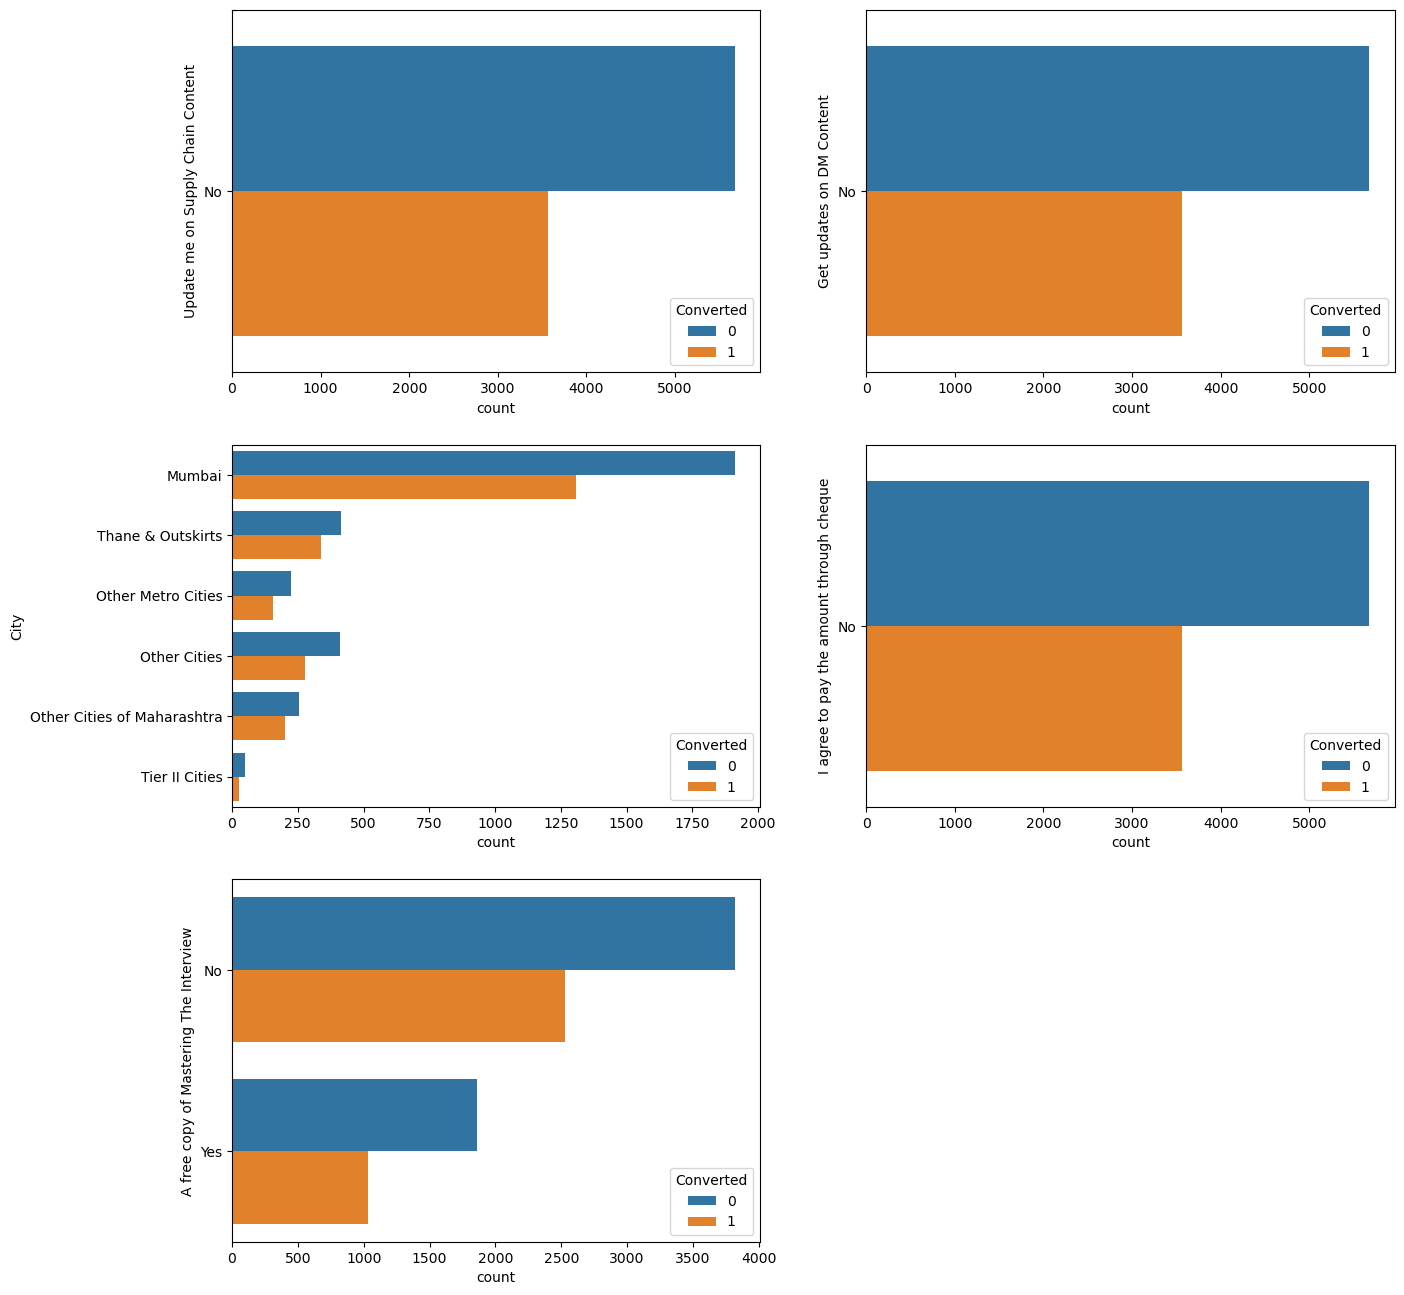

In [43]:
plt.figure(figsize=[15,16])
#plt.subplot(5,2,1)
#sns.countplot(y=df['Tags'],hue=df.Converted)
plt.subplot(3,2,1)
sns.countplot(y=df['Update me on Supply Chain Content'],hue=df.Converted)
plt.subplot(3,2,2)
sns.countplot(y=df['Get updates on DM Content'],hue=df.Converted)
plt.subplot(3,2,3)
sns.countplot(y=df["City"],hue=df.Converted)
plt.subplot(3,2,4)
sns.countplot(y=df['I agree to pay the amount through cheque'],hue=df.Converted)
plt.subplot(3,2,5)
sns.countplot(y=df['A free copy of Mastering The Interview'],hue=df.Converted)
plt.show()

From above visual, columns like 'Update me on supply chain','Get updates on DM content','I agree to pay through cheques' and 'free copy of mastering the interview' has majority columns are highly skewed or have a majority responce as 'No' so they can be dropped

<Axes: xlabel='count', ylabel='Tags'>

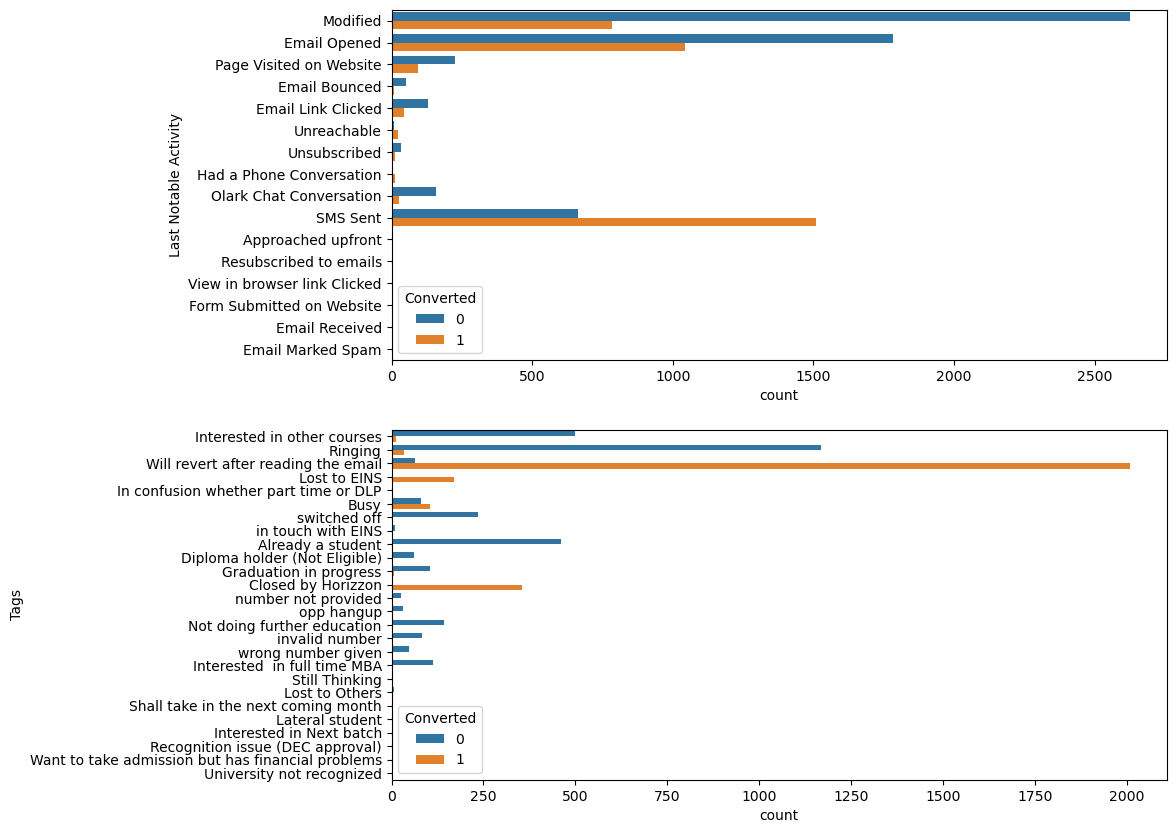

In [44]:
plt.figure(figsize=[10,10])
plt.subplot(2,1,1)
sns.countplot(y=df['Last Notable Activity'],hue=df.Converted)
plt.subplot(2,1,2)
sns.countplot(y=df['Tags'],hue=df.Converted)

Tags is not a part of customer response so it can be dropped, while conversion rate over SMS is maximum when it comes for Last Notable activity

<Axes: xlabel='Converted', ylabel='TotalVisits'>

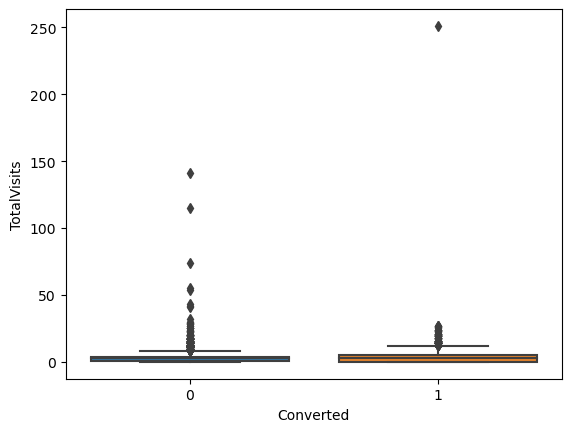

In [45]:
sns.boxplot(x=df.Converted,y=df.TotalVisits)

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

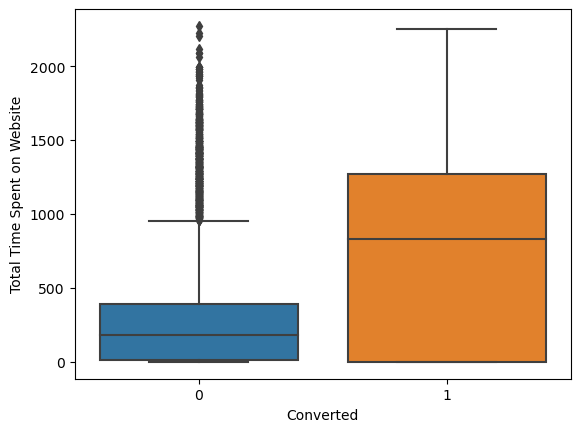

In [46]:
sns.boxplot(x=df.Converted,y=df['Total Time Spent on Website'])

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

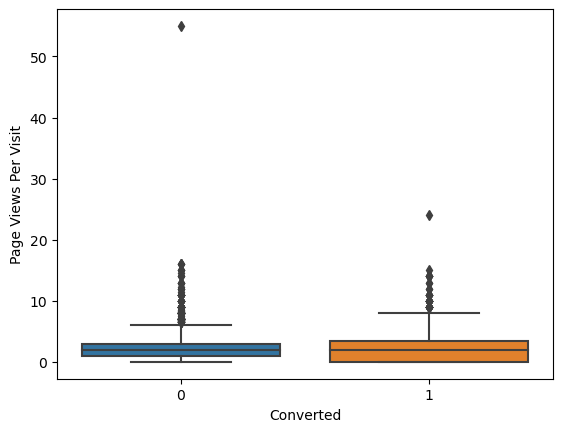

In [47]:
sns.boxplot(x=df.Converted,y=df['Page Views Per Visit'])

# Heatmap

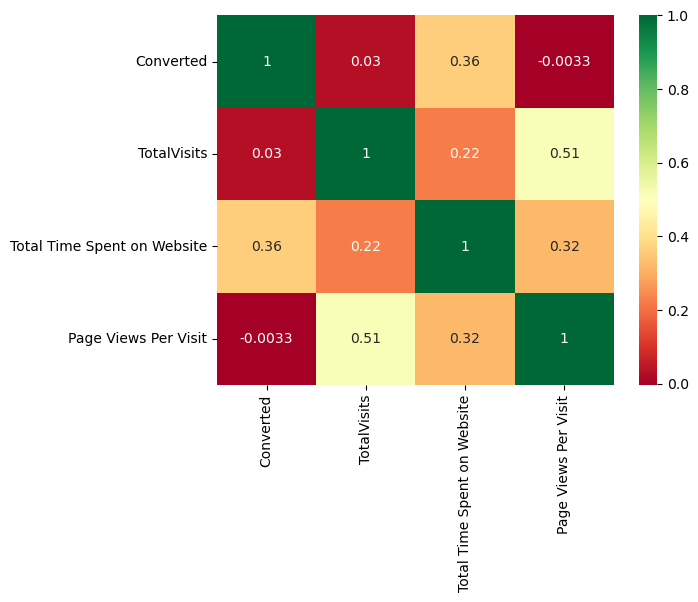

In [48]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [49]:
# No column has a vey high correlation with the target column, as well as no strong correlation among the x variables too.

In [50]:
# Based on the EDA we can drop following columns:

df.drop(["Do Not Call",'Country','Search','Magazine','Newspaper Article',
         'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
         'Receive More Updates About Our Courses','Tags','Update me on Supply Chain Content',
         'Get updates on DM Content','I agree to pay the amount through cheque',
         'A free copy of Mastering The Interview'],axis=1,inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9103 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9103 non-null   float64
 7   Last Activity                                  9137 non-null   object 
 8   Specialization                                 5860 non-null   object 
 9   What is your current occupation                6550 

In [52]:
df.isna().sum()/len(df)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
City                                             39.707792
Last Notable Activity                             0.000000
dtype: float64

In [53]:
# Null value replacement

# Filling the null values from specialization column with 'other', since a lot of people might not have their specialization in the data 
df['Specialization'].fillna('Other',inplace=True)

# Filling occupation with 'Other', with same logic that a lot of customers may not have their occupation listed in the data
df['What is your current occupation'].fillna('Other',inplace=True)

# Replacing nulls with the mode of data
df['What matters most to you in choosing a course'].fillna(df['What matters most to you in choosing a course'].mode()[0],inplace=True)

# Replacing nulls from City column with Mode 
df['City'].fillna(df['City'].mode()[0],inplace=True)

In [54]:
df.isna().sum()/len(df)*100

Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
City                                             0.000000
Last Notable Activity                            0.000000
dtype: float64

In [55]:
# Dropping rows with less than 2 percent nulls

df.dropna(inplace=True)

In [56]:
# Checking the shape again

df.shape

(9074, 13)

In [57]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,City,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Better Career Prospects,Mumbai,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Other,Unemployed,Better Career Prospects,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Better Career Prospects,Mumbai,Modified


In [58]:
# Balancing the outliers

percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

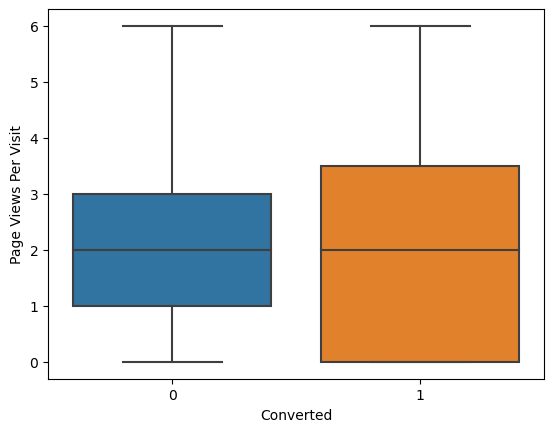

In [59]:
sns.boxplot(x=df.Converted,y=df['Page Views Per Visit'])
plt.show()

In [60]:
# Replacing thhe only binary column with 1 and 0

df['Do Not Email'].replace('No',0,inplace=True)
df['Do Not Email'].replace('Yes',1,inplace=True)

In [61]:
df_cat=df[["Lead Origin",'Lead Source','Last Activity','Specialization','What is your current occupation','What matters most to you in choosing a course','City','Last Notable Activity']]

In [62]:
# Creating dummies

df_cat=pd.get_dummies(df_cat,drop_first='first')

In [63]:
df_cat.shape

(9074, 78)

In [64]:
# Joining twoo columns 

df=pd.concat([df,df_cat],axis=1)

In [65]:
df.drop(["Lead Origin",'Lead Source','Last Activity','Specialization','What is your current occupation','What matters most to you in choosing a course','City','Last Notable Activity'],axis=1,inplace=True)

# Model Building 

In [66]:
y=df['Converted']
x=df.drop('Converted',axis=1)

In [67]:
import sklearn
from sklearn.model_selection import train_test_split

In [68]:
# Train test split

x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [69]:
x_train.shape

(6351, 82)

In [70]:
#Feature Scaling

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scalar=StandardScaler()

In [73]:
x_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]=scalar.fit_transform(x_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

In [74]:
x_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.284595,-0.160255,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,-0.284595,-0.540048,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,-0.671384,-0.888650,-1.265540,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,-0.284595,1.643304,-0.155018,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0.295588,2.017593,0.122613,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# RFE mode of feature selection

In [75]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=20)             
rfe = rfe.fit(x_train, y_train)

In [76]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 36),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 35),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 33),
 ('Lead Source_Direct Traffic', False, 5),
 ('Lead Source_Facebook', False, 34),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Live Chat', False, 31),
 ('Lead Source_NC_EDM', False, 9),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 7),
 ('Lead Source_Pay per Click Ads', False, 32),
 ('Lead Source_Press_Release', False, 52),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 6),
 ('Lead Source_Social Media', False, 25),
 ('Lead Source_WeLearn', False, 62),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 58),
 ('Lead Source_blog', False, 30),
 ('Lead Source_testone', False, 26),
 ('Lead Source_welearnblog_Home', False, 41),
 ('Lead Source

In [77]:
cols = x_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Other',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Other', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [78]:
x_train_rfe=x_train[cols]

In [79]:
import statsmodels.api as sm

# Model 1

In [80]:
x_train_sm=sm.add_constant(x_train_rfe)
Logr=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
Logr_model=Logr.fit()
Logr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2506.4
Date:                Mon, 18 Sep 2023   Deviance:                       5012.7
Time:                        20:24:28   Pearson chi2:                 6.16e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4194
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3877      0.158     -2.451      0.014      -0.698      -0.078
Do Not Email                                            -1.5545      0.198     -7.856      0.000      -1.942      -1.167
Total Time Spent on Website                              1.1212      0.042     26.947      0.000       1.040       1.203
Lead Origin_Landing Page Submission                     -1.0178      0.130     -7.857      0.000      -1.272      -0.764
Lead Origin_Lead Add Form                                1.3608      0.902      1.509      0.131      -0.407       3.129
Lead Source_Olark Chat                                   1.1657      0.124      9.383      0.000       0.922       1.409
Lead Source_Reference                                    1.7552      0.925      1.898      0.058      -0.058       3.568
Lead Source_Welingak Website                             4.1962      1.156      3.629      0.000       1.930       6.462
Last Activity_Email Opened                               0.4725      0.112      4.236      0.000       0.254       0.691
Last Activity_Had a Phone Conversation                   2.3359      1.154      2.025      0.043       0.075       4.597
Last Activity_Other                                      1.8946      0.614      3.087      0.002       0.692       3.097
Last Activity_SMS Sent                                   1.6690      0.112     14.862      0.000       1.449       1.889
Last Activity_Unsubscribed                               1.6102      0.489      3.293      0.001       0.652       2.569
Specialization_Other                                    -0.9629      0.127     -7.572      0.000      -1.212      -0.714
What is your current occupation_Housewife               22.4682   1.55e+04      0.001      0.999   -3.04e+04    3.05e+04
What is your current occupation_Other                   -1.1392      0.090    -12.713      0.000      -1.315      -0.964
What is your current occupation_Working Professional     2.3733      0.195     12.156      0.000       1.991       2.756
Last Notable Activity_Had a Phone Conversation           1.3499      1.611      0.838      0.402      -1.807       4.507
Last Notable Activity_Modified                          -0.7598      0.091     -8.326      0.000      -0.939      -0.581
Last Notable Activity_Olark Chat Conversation           -0.7999      0.348     -2.301      0.021      -1.481      -0.118
Last Notable Activity_Unreachable                        2.1791      0.506      4.305      0.000       1.187       3.171
========================================================================================================================
"""

In [81]:
x_train_rfe.drop("What is your current occupation_Housewife",axis=1,inplace=True)

# Model 2

In [82]:
x_train_sm=sm.add_constant(x_train_rfe)
Logr=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
Logr_model=Logr.fit()
Logr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2510.0
Date:                Mon, 18 Sep 2023   Deviance:                       5020.0
Time:                        20:24:28   Pearson chi2:                 6.18e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4188
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3827      0.158     -2.422      0.015      -0.692      -0.073
Do Not Email                                            -1.5561      0.198     -7.863      0.000      -1.944      -1.168
Total Time Spent on Website                              1.1204      0.042     26.955      0.000       1.039       1.202
Lead Origin_Landing Page Submission                     -1.0180      0.129     -7.865      0.000      -1.272      -0.764
Lead Origin_Lead Add Form                                1.3571      0.902      1.505      0.132      -0.410       3.125
Lead Source_Olark Chat                                   1.1645      0.124      9.375      0.000       0.921       1.408
Lead Source_Reference                                    1.7755      0.925      1.920      0.055      -0.037       3.588
Lead Source_Welingak Website                             4.1990      1.156      3.632      0.000       1.933       6.465
Last Activity_Email Opened                               0.4755      0.111      4.268      0.000       0.257       0.694
Last Activity_Had a Phone Conversation                   2.3363      1.153      2.026      0.043       0.076       4.597
Last Activity_Other                                      1.8936      0.614      3.084      0.002       0.690       3.097
Last Activity_SMS Sent                                   1.6663      0.112     14.848      0.000       1.446       1.886
Last Activity_Unsubscribed                               1.6093      0.489      3.291      0.001       0.651       2.568
Specialization_Other                                    -0.9672      0.127     -7.609      0.000      -1.216      -0.718
What is your current occupation_Other                   -1.1412      0.090    -12.741      0.000      -1.317      -0.966
What is your current occupation_Working Professional     2.3683      0.195     12.130      0.000       1.986       2.751
Last Notable Activity_Had a Phone Conversation           1.3449      1.611      0.835      0.404      -1.812       4.502
Last Notable Activity_Modified                          -0.7616      0.091     -8.352      0.000      -0.940      -0.583
Last Notable Activity_Olark Chat Conversation           -0.7999      0.348     -2.301      0.021      -1.481      -0.119
Last Notable Activity_Unreachable                        2.1764      0.506      4.299      0.000       1.184       3.168
========================================================================================================================
"""

In [83]:
x_train_rfe.drop("Last Notable Activity_Had a Phone Conversation",axis=1,inplace=True)

# Model 3

In [84]:
x_train_sm=sm.add_constant(x_train_rfe)
Logr=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
Logr_model=Logr.fit()
Logr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2510.3
Date:                Mon, 18 Sep 2023   Deviance:                       5020.7
Time:                        20:24:28   Pearson chi2:                 6.18e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4187
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3789      0.158     -2.400      0.016      -0.688      -0.069
Do Not Email                                            -1.5603      0.198     -7.889      0.000      -1.948      -1.173
Total Time Spent on Website                              1.1199      0.042     26.948      0.000       1.038       1.201
Lead Origin_Landing Page Submission                     -1.0176      0.129     -7.864      0.000      -1.271      -0.764
Lead Origin_Lead Add Form                                1.3575      0.902      1.505      0.132      -0.410       3.125
Lead Source_Olark Chat                                   1.1657      0.124      9.383      0.000       0.922       1.409
Lead Source_Reference                                    1.7766      0.925      1.921      0.055      -0.036       3.589
Lead Source_Welingak Website                             4.2019      1.156      3.634      0.000       1.936       6.468
Last Activity_Email Opened                               0.4725      0.111      4.244      0.000       0.254       0.691
Last Activity_Had a Phone Conversation                   3.1026      0.765      4.057      0.000       1.604       4.602
Last Activity_Other                                      1.8938      0.614      3.084      0.002       0.690       3.097
Last Activity_SMS Sent                                   1.6638      0.112     14.831      0.000       1.444       1.884
Last Activity_Unsubscribed                               1.6105      0.489      3.293      0.001       0.652       2.569
Specialization_Other                                    -0.9700      0.127     -7.634      0.000      -1.219      -0.721
What is your current occupation_Other                   -1.1395      0.090    -12.727      0.000      -1.315      -0.964
What is your current occupation_Working Professional     2.3685      0.195     12.129      0.000       1.986       2.751
Last Notable Activity_Modified                          -0.7661      0.091     -8.413      0.000      -0.945      -0.588
Last Notable Activity_Olark Chat Conversation           -0.8028      0.348     -2.309      0.021      -1.484      -0.121
Last Notable Activity_Unreachable                        2.1722      0.506      4.292      0.000       1.180       3.164
========================================================================================================================
"""

In [85]:
x_train_rfe.drop("Lead Origin_Lead Add Form",axis=1,inplace=True)

# Model 4

In [86]:
x_train_sm=sm.add_constant(x_train_rfe)
Logr=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
Logr_model=Logr.fit()
Logr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2511.6
Date:                Mon, 18 Sep 2023   Deviance:                       5023.2
Time:                        20:24:28   Pearson chi2:                 6.18e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4185
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3606      0.157     -2.292      0.022      -0.669      -0.052
Do Not Email                                            -1.5622      0.198     -7.898      0.000      -1.950      -1.174
Total Time Spent on Website                              1.1182      0.042     26.944      0.000       1.037       1.200
Lead Origin_Landing Page Submission                     -1.0337      0.129     -8.010      0.000      -1.287      -0.781
Lead Source_Olark Chat                                   1.1592      0.124      9.350      0.000       0.916       1.402
Lead Source_Reference                                    3.1203      0.241     12.937      0.000       2.648       3.593
Lead Source_Welingak Website                             5.5507      0.731      7.594      0.000       4.118       6.983
Last Activity_Email Opened                               0.4718      0.111      4.241      0.000       0.254       0.690
Last Activity_Had a Phone Conversation                   3.0981      0.765      4.050      0.000       1.599       4.598
Last Activity_Other                                      1.8912      0.614      3.081      0.002       0.688       3.094
Last Activity_SMS Sent                                   1.6636      0.112     14.840      0.000       1.444       1.883
Last Activity_Unsubscribed                               1.6088      0.489      3.290      0.001       0.650       2.567
Specialization_Other                                    -0.9801      0.127     -7.723      0.000      -1.229      -0.731
What is your current occupation_Other                   -1.1419      0.089    -12.760      0.000      -1.317      -0.967
What is your current occupation_Working Professional     2.3652      0.195     12.110      0.000       1.982       2.748
Last Notable Activity_Modified                          -0.7672      0.091     -8.427      0.000      -0.946      -0.589
Last Notable Activity_Olark Chat Conversation           -0.8058      0.348     -2.318      0.020      -1.487      -0.125
Last Notable Activity_Unreachable                        2.1684      0.506      4.283      0.000       1.176       3.161
========================================================================================================================
"""

In [87]:
# As we can see the P value for all columns is less than 0.05

# VIF (Variance Inflation Factor)

In [88]:
# Checking the VIF score of all remaining columns

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,19.77
3,Lead Origin_Landing Page Submission,3.35
12,Specialization_Other,2.99
7,Last Activity_Email Opened,2.13
10,Last Activity_SMS Sent,2.02
4,Lead Source_Olark Chat,1.78
15,Last Notable Activity_Modified,1.51
5,Lead Source_Reference,1.49
2,Total Time Spent on Website,1.33
1,Do Not Email,1.17


### As it can be seen that, VIF for all the features is less than 5 we can proceed with prediction

In [89]:
# Predicting y_train from the model

y_train_predicted=Logr_model.predict(x_train_sm)

In [90]:
y_train_predicted.head(10)

3009    0.095900
1012    0.101988
9226    0.430736
4750    0.724106
7987    0.852987
1281    0.784892
2880    0.045220
4971    0.968687
7536    0.894920
1248    0.829166
dtype: float64

In [91]:
y_train_pred_model = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_predicted})
y_train_pred_model['Prospect ID'] = y_train.index
y_train_pred_model.head()

,Converted,Converted_prob,Prospect ID
3009,0,0.095900,3009
1012,0,0.101988,1012
9226,0,0.430736,9226
4750,1,0.724106,4750
7987,1,0.852987,7987


In [92]:
# Taking a random cutoff point as 0.5

y_train_pred_model['Predicted']=y_train_pred_model.Converted_prob.map(lambda x: 1 if x>0.5 else 0)

In [93]:
y_train_pred_model

,Converted,Converted_prob,Prospect ID,Predicted
3009,0,0.095900,3009,0
1012,0,0.101988,1012,0
9226,0,0.430736,9226,0
4750,1,0.724106,4750,1
7987,1,0.852987,7987,1
...,...,...,...,...
367,0,0.070191,367,0
82,1,0.897531,82,1
8199,0,0.920522,8199,1
7077,0,0.273988,7077,0


In [94]:
from sklearn import metrics

In [95]:
confusion = metrics.confusion_matrix(y_train_pred_model.Converted, y_train_pred_model.Predicted )
print(confusion)

[[3468  437]
 [ 711 1735]]


In [96]:
# Accuracy

print('Accuracy :',metrics.accuracy_score(y_train_pred_model.Converted, y_train_pred_model.Predicted))

Accuracy : 0.8192410643993072


In [97]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [98]:
# Sensitivity

print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7093213409648406


In [99]:
# Specificity 

print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8880921895006402


In [100]:
# False Positive Rate

print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.1119078104993598


In [101]:
# positive predictive value 

print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7988029465930019


In [102]:
# Negative predictive value

print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8298636037329504


## ROC Curve

In [103]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [104]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_model.Converted, y_train_pred_model.Converted_prob, drop_intermediate = False )

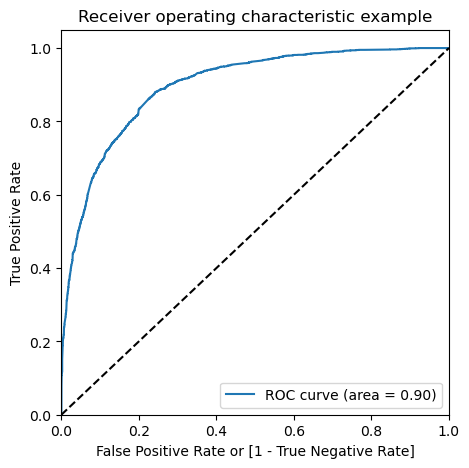

In [105]:
draw_roc(y_train_pred_model.Converted, y_train_pred_model.Converted_prob)

ROC curve =0.9, it means the overall True positive rate is high. After trying out number of combinations from 0.0 to 0.9 it looks like a cut-off point of 0.35 is ideal for this business case. 

In [106]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_model[i]= y_train_pred_model.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_model.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.095900,3009,0,1,0,0,0,0,0,0,0,0,0
1012,0,0.101988,1012,0,1,1,0,0,0,0,0,0,0,0
9226,0,0.430736,9226,0,1,1,1,1,1,0,0,0,0,0
4750,1,0.724106,4750,1,1,1,1,1,1,1,1,1,0,0
7987,1,0.852987,7987,1,1,1,1,1,1,1,1,1,1,0


In [107]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_model.Converted, y_train_pred_model[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.644938  0.973835  0.438924
0.2   0.2  0.767753  0.917825  0.673752
0.3   0.3  0.804913  0.873671  0.761844
0.4   0.4  0.814990  0.780049  0.836876
0.5   0.5  0.819241  0.709321  0.888092
0.6   0.6  0.813730  0.643500  0.920359
0.7   0.7  0.789010  0.540474  0.944686
0.8   0.8  0.766966  0.449714  0.965685
0.9   0.9  0.726027  0.310303  0.986428


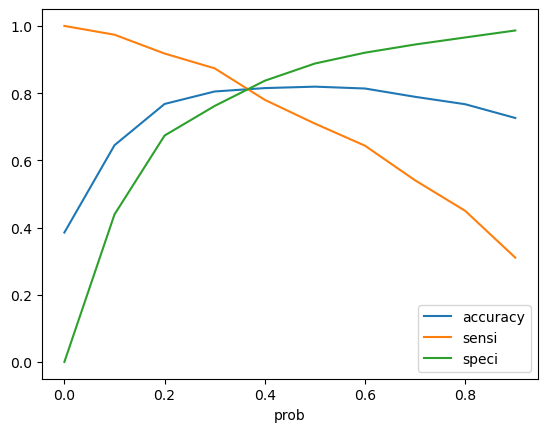

In [108]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Accuracy, Sensitivity and Specificity all converge into one point 0.35

In [109]:
y_train_pred_model['final_predicted'] = y_train_pred_model.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_model.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3009,0,0.095900,3009,0,1,0,0,0,0,0,0,0,0,0,0
1012,0,0.101988,1012,0,1,1,0,0,0,0,0,0,0,0,0
9226,0,0.430736,9226,0,1,1,1,1,1,0,0,0,0,0,1
4750,1,0.724106,4750,1,1,1,1,1,1,1,1,1,0,0,1
7987,1,0.852987,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [110]:
y_train_pred_model['Lead_Score'] = y_train_pred_model.Converted_prob.map( lambda x: round(x*100))

y_train_pred_model.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
3009,0,0.095900,3009,0,1,0,0,0,0,0,0,0,0,0,0,10
1012,0,0.101988,1012,0,1,1,0,0,0,0,0,0,0,0,0,10
9226,0,0.430736,9226,0,1,1,1,1,1,0,0,0,0,0,1,43
4750,1,0.724106,4750,1,1,1,1,1,1,1,1,1,0,0,1,72
7987,1,0.852987,7987,1,1,1,1,1,1,1,1,1,1,0,1,85


# Model Evaluation

In [111]:
print("Accuracy :",metrics.accuracy_score(y_train_pred_model.Converted, y_train_pred_model.final_predicted))

Accuracy : 0.8094788222327193


In [112]:
confusion2 = metrics.confusion_matrix(y_train_pred_model.Converted, y_train_pred_model.final_predicted )
confusion2

array([[3148,  757],
       [ 453, 1993]], dtype=int64)

In [113]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [114]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8147996729354048


In [115]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.806145966709347


In [116]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.193854033290653


In [117]:
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7247272727272728


In [118]:
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8742016106637045


# Precision and Recall for Training data

In [119]:
confusion = metrics.confusion_matrix(y_train_pred_model.Converted, y_train_pred_model.Predicted )
confusion

array([[3468,  437],
       [ 711, 1735]], dtype=int64)

In [120]:
# Precision

TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7988029465930019


In [121]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.7093213409648406


In [122]:
from sklearn.metrics import precision_recall_curve

y_train_pred_model.Converted, y_train_pred_model.Predicted

(3009    0
 1012    0
 9226    0
 4750    1
 7987    1
        ..
 367     0
 82      1
 8199    0
 7077    0
 5754    0
 Name: Converted, Length: 6351, dtype: int64,
 3009    0
 1012    0
 9226    0
 4750    1
 7987    1
        ..
 367     0
 82      1
 8199    1
 7077    0
 5754    0
 Name: Predicted, Length: 6351, dtype: int64)

In [123]:
p, r, thresholds = precision_recall_curve(y_train_pred_model.Converted, y_train_pred_model.Converted_prob)

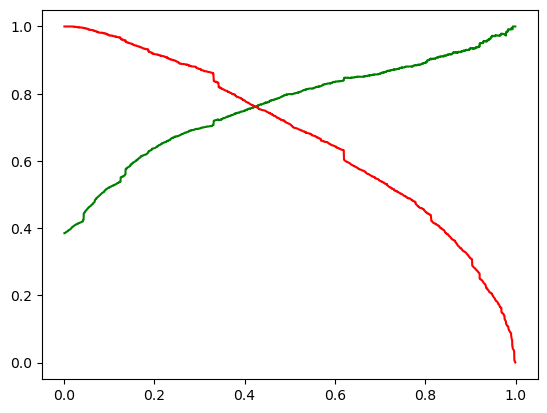

In [124]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [125]:
x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scalar.transform(x_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [126]:
x_train_rfe

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_Other,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Other,What is your current occupation_Other,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
3009,0,-0.160255,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1012,1,-0.540048,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
9226,0,-0.888650,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
4750,0,1.643304,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
7987,0,2.017593,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,0.595662,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
82,0,-0.888650,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
8199,0,-0.888650,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
7077,0,-0.046500,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# Assigning columns from the model to the test set

In [127]:
x_test=x_test[["Do Not Email","Total Time Spent on Website","Lead Origin_Landing Page Submission","Lead Source_Olark Chat","Lead Source_Reference","Lead Source_Welingak Website","Last Activity_Email Opened","Last Activity_Had a Phone Conversation","Last Activity_Other","Last Activity_SMS Sent","Last Activity_Unsubscribed","Specialization_Other","What is your current occupation_Other","What is your current occupation_Working Professional","Last Notable Activity_Modified","Last Notable Activity_Olark Chat Conversation","Last Notable Activity_Unreachable"]]

In [128]:
x_test

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_Other,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Other,What is your current occupation_Other,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
3271,0,-0.600595,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
1490,0,1.887326,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
7936,0,-0.752879,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
4216,0,-0.888650,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3830,0,-0.587751,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,0,0.632357,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2879,0,0.192017,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6501,0,1.560740,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7155,0,0.056246,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [129]:
x_test_sm=sm.add_constant(x_test)

In [130]:
y_test_pred=Logr_model.predict(x_test_sm)

In [131]:
y_test_pred

3271    0.064015
1490    0.972162
7936    0.054538
4216    0.813158
3830    0.061706
          ...   
850     0.069378
2879    0.124909
6501    0.882315
7155    0.059038
376     0.028363
Length: 2723, dtype: float64

In [132]:
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
3271,0.064015
1490,0.972162
7936,0.054538
4216,0.813158
3830,0.061706


In [133]:
y_test_df = pd.DataFrame(y_test)

In [134]:
y_test_df['Prospect ID'] = y_test_df.index

In [135]:
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [136]:
y_pred_model = pd.concat([y_test_df, y_pred_df],axis=1)

In [137]:
y_pred_model

,Converted,Prospect ID,0
0,0,3271,0.064015
1,1,1490,0.972162
2,0,7936,0.054538
3,1,4216,0.813158
4,0,3830,0.061706
...,...,...,...
2718,0,850,0.069378
2719,0,2879,0.124909
2720,1,6501,0.882315
2721,0,7155,0.059038


In [138]:
y_pred_model= y_pred_model.rename(columns={ 0 : 'Converted_probability'})

In [139]:
y_pred_model.head()

,Converted,Prospect ID,Converted_probability
0,0,3271,0.064015
1,1,1490,0.972162
2,0,7936,0.054538
3,1,4216,0.813158
4,0,3830,0.061706


In [140]:
# Creating a new column Predicted 

y_pred_model['Predicted'] = y_pred_model.Converted_probability.map(lambda x: 1 if x > 0.35 else 0)

In [141]:
y_pred_model.head()

,Converted,Prospect ID,Converted_probability,Predicted
0,0,3271,0.064015,0
1,1,1490,0.972162,1
2,0,7936,0.054538,0
3,1,4216,0.813158,1
4,0,3830,0.061706,0


In [142]:
print("Accuracy :",metrics.accuracy_score(y_pred_model.Converted, y_pred_model.Predicted))

Accuracy : 0.8071979434447301


In [143]:
confusion2 = metrics.confusion_matrix(y_pred_model.Converted, y_pred_model.Predicted )
confusion2

array([[1403,  331],
       [ 194,  795]], dtype=int64)

In [144]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8038422649140546


In [146]:
print("Specificity :",TN / float(TN+FP))


Specificity : 0.8091118800461361


# Precision Recall for Test Data

In [147]:
print('Precision: ',confusion2[1,1]/(confusion2[1,1]+confusion2[0,1]))

Precision:  0.7060390763765542


In [148]:
print("Recall :",confusion2[1,1]/(confusion2[1,1]+confusion2[1,0]))

Recall : 0.8038422649140546


# Lead Score

In [149]:
y_pred_model['Lead_Score'] = y_pred_model.Converted_probability.map( lambda x: round(x*100))

y_pred_model.head()

,Converted,Prospect ID,Converted_probability,Predicted,Lead_Score
0,0,3271,0.064015,0,6
1,1,1490,0.972162,1,97
2,0,7936,0.054538,0,5
3,1,4216,0.813158,1,81
4,0,3830,0.061706,0,6


In [150]:
Hot_leads=y_pred_model[(y_pred_model['Lead_Score']>85)]

In [151]:
Hot_leads=pd.DataFrame(Hot_leads.index)

In [152]:
Hot_leads.values.reshape(-1)

array([   1,    8,   16,   21,   23,   25,   30,   33,   35,   46,   52,
         54,   57,   70,   75,   87,   99,  106,  114,  117,  119,  130,
        133,  136,  137,  140,  145,  149,  162,  165,  172,  177,  181,
        184,  199,  203,  215,  224,  235,  240,  252,  253,  261,  264,
        280,  282,  283,  287,  327,  351,  371,  411,  412,  414,  439,
        452,  465,  467,  474,  505,  507,  518,  519,  531,  535,  539,
        542,  549,  551,  558,  565,  566,  569,  571,  573,  580,  581,
        585,  601,  606,  608,  609,  619,  621,  634,  641,  650,  651,
        655,  657,  658,  662,  667,  670,  675,  677,  678,  679,  684,
        685,  691,  708,  711,  734,  735,  738,  743,  752,  761,  776,
        810,  814,  817,  820,  823,  843,  853,  864,  867,  868,  873,
        890,  900,  905,  911,  916,  926,  938,  939,  947,  953,  972,
        983,  997,  998, 1007, 1010, 1018, 1029, 1033, 1047, 1048, 1055,
       1059, 1067, 1068, 1073, 1078, 1084, 1095, 11

### Hot leads are the customers with lead score more than 85, and are potetial customers for X education

In [153]:
Logr_model.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.550670
Lead Source_Reference                                   3.120338
Last Activity_Had a Phone Conversation                  3.098089
What is your current occupation_Working Professional    2.365154
Last Notable Activity_Unreachable                       2.168449
Last Activity_Other                                     1.891184
Last Activity_SMS Sent                                  1.663552
Last Activity_Unsubscribed                              1.608834
Lead Source_Olark Chat                                  1.159220
Total Time Spent on Website                             1.118231
Last Activity_Email Opened                              0.471792
const                                                  -0.360570
Last Notable Activity_Modified                         -0.767184
Last Notable Activity_Olark Chat Conversation          -0.805824
Specialization_Other                                   -0.980150
Lead Origin_Landing Page 

# Top Reccomendations: 

### 1. if lead is coming from welingak website there is a high possibility that the lead will be converted 
### 2. if Lead source is Reference, X education should persue the client since it is a potential lead
### 3. It can be seen that customers with last activity as phone are potential clients 
### 4. Working professionals are the biggest customer category for X education, since they are looking to upgrade themselves
### 5. X education should make calls to the customers who's last activity is SMS sent
### 6. Company should make calls to potential customers who have come from Olark chat, as they can be potential buyers
### 7. X education should give priority to the potential customers from Mumbai, as the convevrsion rate for people from Mumbai is the highest.
### 8. X Education should especially not contact those customers who have opted in for Do not Email or who have ticked occupation as Others, or whose specialization is not in the list